In [15]:
import torch
import torchvision.models as models
from resnet import resnet110
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
from resnet import resnet1202

In [16]:
# Load the file
data = torch.load("pretrained_models/resnet1202-f3b1deed.th", map_location=torch.device('cpu'), weight_only)  # Error doesn't matter, can be removed by adding param weights_only = True

# Check if the loaded data is a dictionary and contains 'state_dict'
if isinstance(data, dict) and 'state_dict' in data:
    state_dict = data['state_dict']
else:
    raise ValueError("The loaded data does not contain a valid 'state_dict'. Check the file structure.")


/var/folders/yg/964d4l9n3p52nw0zbcbzxg300000gn/T/ipykernel_47887/2784726074.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load("pretrained_models/resnet12

In [17]:
best_precision = data['best_prec1']
print(f"Best precision achieved during training: {best_precision}")

Best precision achieved during training: 93.94


In [18]:
# Initialize the ResNet-1202 model
model = resnet1202()

# Fix potential key mismatches by removing prefixes
state_dict = {key.replace('module.', ''): value for key, value in state_dict.items()}

# Load the fixed state_dict into the model
model.load_state_dict(state_dict)

# Set to evaluation mode for inference - This line prints the details of the model, layer by layer
#model.eval() 

<All keys matched successfully>

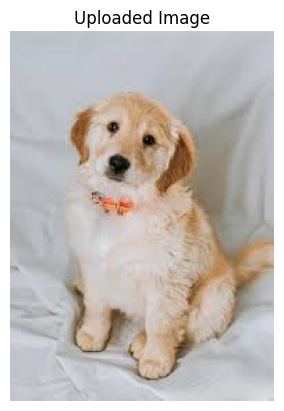

Predicted Class: 5
Class Probabilities: tensor([[0.0086, 0.0065, 0.0116, 0.0525, 0.0070, 0.7566, 0.0588, 0.0131, 0.0044,
         0.0808]])
Predicted Label: dog


In [19]:
# Step 1: Load your image
image_path = 'dog_image_test.jpeg'
image = Image.open(image_path)

# Step 2: Define a transformation pipeline
transform = transforms.Compose([
    transforms.Resize((32, 32)),             # Resize the image to 32x32
    transforms.ToTensor(),                   # Convert image to PyTorch tensor
    transforms.Normalize(                    # Normalize with CIFAR-10 stats
        mean=[0.4914, 0.4822, 0.4465],       # CIFAR-10 mean
        std=[0.2023, 0.1994, 0.2010]         # CIFAR-10 std
    )
])

# Step 3: Transform the image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Visualize the transformed image (optional)
plt.imshow(image)
plt.title("Uploaded Image")
plt.axis('off')
plt.show()

# Step 4: Perform inference with the model
with torch.no_grad():
    output = model(input_tensor)

# Step 5: Apply softmax to get probabilities
softmax = torch.nn.Softmax(dim=1)
probs = softmax(output)

# Step 6: Print predicted class and probabilities
predicted_class = torch.argmax(probs, dim=1).item()
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probs}")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Predicted Label: {class_names[predicted_class]}")


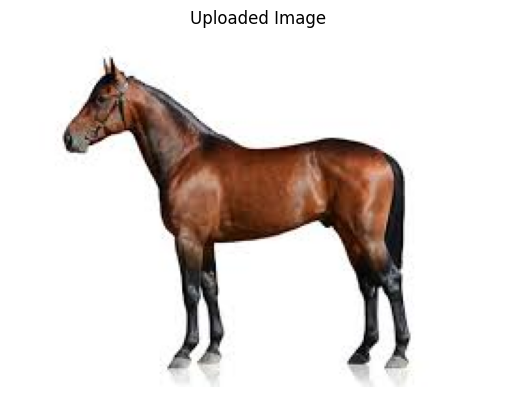

Predicted Class: 7
Class Probabilities: tensor([[1.2289e-04, 4.9370e-05, 1.0999e-04, 2.5971e-04, 2.7078e-03, 3.5159e-03,
         7.4096e-05, 9.9310e-01, 7.2253e-06, 5.2799e-05]])
Predicted Label: horse


In [21]:
# Step 1: Load your image
image_path = 'horse_image_test.jpeg'
image = Image.open(image_path)

# Step 2: Define a transformation pipeline
transform = transforms.Compose([
    transforms.Resize((32, 32)),             # Resize the image to 32x32
    transforms.ToTensor(),                   # Convert image to PyTorch tensor
    transforms.Normalize(                    # Normalize with CIFAR-10 stats
        mean=[0.4914, 0.4822, 0.4465],       # CIFAR-10 mean
        std=[0.2023, 0.1994, 0.2010]         # CIFAR-10 std
    )
])

# Step 3: Transform the image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Visualize the transformed image (optional)
plt.imshow(image)
plt.title("Uploaded Image")
plt.axis('off')
plt.show()

# Step 4: Perform inference with the model
with torch.no_grad():
    output = model(input_tensor)

# Step 5: Apply softmax to get probabilities
softmax = torch.nn.Softmax(dim=1)
probs = softmax(output)

# Step 6: Print predicted class and probabilities
predicted_class = torch.argmax(probs, dim=1).item()
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probs}")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Predicted Label: {class_names[predicted_class]}")


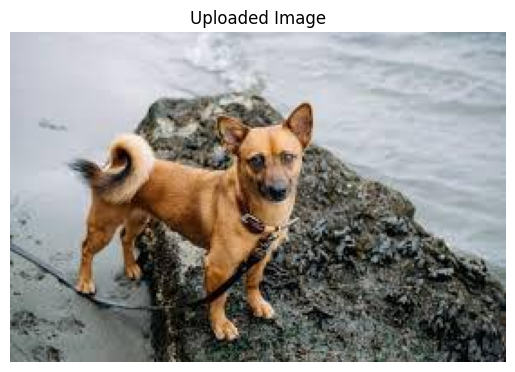

Predicted Class: 5
Class Probabilities: tensor([[0.0139, 0.0091, 0.0459, 0.1932, 0.1473, 0.4245, 0.0409, 0.0665, 0.0401,
         0.0185]])
Predicted Label: dog


In [22]:
# Step 1: Load your image
image_path = 'dog_75.jpg'
image = Image.open(image_path)

# Step 2: Define a transformation pipeline
transform = transforms.Compose([
    transforms.Resize((32, 32)),             # Resize the image to 32x32
    transforms.ToTensor(),                   # Convert image to PyTorch tensor
    transforms.Normalize(                    # Normalize with CIFAR-10 stats
        mean=[0.4914, 0.4822, 0.4465],       # CIFAR-10 mean
        std=[0.2023, 0.1994, 0.2010]         # CIFAR-10 std
    )
])

# Step 3: Transform the image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Visualize the transformed image (optional)
plt.imshow(image)
plt.title("Uploaded Image")
plt.axis('off')
plt.show()

# Step 4: Perform inference with the model
with torch.no_grad():
    output = model(input_tensor)

# Step 5: Apply softmax to get probabilities
softmax = torch.nn.Softmax(dim=1)
probs = softmax(output)

# Step 6: Print predicted class and probabilities
predicted_class = torch.argmax(probs, dim=1).item()
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probs}")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Predicted Label: {class_names[predicted_class]}")
